# 10. Clustering

Acá va a ser donde todo el conocimiento que adquirimos hasta ahora se va a juntar.

Lo que vamos a hacer es tratar de clusterizar una colección de vectores en grupos o clústers de vectores que son los que estarán cerca unos de otros y todo a través de medir las distancias a pares.

Supongamos que tenemos un grupo de $N$-vectores $x_0,x_1,...,x_{N-1}$. El objetivo de clustering es agrupar (si es posible) en grupos los vectores tal que dentro de esos grupos estén lo más cerca posible unos de otros.

![imagen](https://raw.githubusercontent.com/uncrayon/al-vectores/96cd14e7c8d056445f1172467eb05cb220e7f67d/Clase%2026%20a%2028%20-%20Clustering/fig1.png)

## 10.1 El objetivo de clustering

**Específicar el asignamiento de clúster**. Uno de los primeros problemas es asignar a una serie de vectores un clúster. Ahora, para empezar, vamos a partir teniendo las etiquetas $1,2,..,k$ que representan los clusters o grupos y estas etiquetas se las vamos a asignar a nuestros $N$ vectores usando al $N$-vector $c$, donde $c_i$ va a representar el grupo al que el vector $x_i$ está asignado. Por ejemplo, si $N=6$ y $k=3$, y además  $ c^{T} = [3, 1, 1, 1, 2, 2]$ entonces esto significa que el vector $x_0$ quedará asignado al grupo $3$, los vectores $x_1,x_2,x_3$ 
estarán asignados al grupo $1$ y los vectores $x_4,x_5$ quedarán asignados al grupo 2. Ahora, una forma alternativa de expresar esto es con conjuntos de los index de los vectores. Vamos a denotar como $G_i$ al grupo $i$ de indices de vectores que pertenecen a cada grupo. Continuando nuestro ejemplo entonces tenemos que

$$ G_1 = \{1,2,3\} \;\; G_2 = \{4,5\}\;\; G_3 = \{0\} $$ 


**Representativos** de un grupo. Ahora, consideremos de nuevo que tenemos $k$ grupos, a cada uno de estos grupos le vamos a asignar un vector representativo, el cual vamos a denotar por $z_1,z_2,...,z_k$. Estos vectores representativos pueden ser cualquier vector, no tience que ser necesariamente uno de los vectores dados sin embargo tiene que ser tal que la distancia de este $z_i$ a todos los otros vectores del grupo sea la mínima.

**Un objetivo de clustering**. Ahora bien, ya que definimos lo anterior podemos dar una métrica que nos ayude a juzgar la elección de un clúster en conjunto con los representativos de cada grupo. Definimos entonces:

$$
J^{clust} = \left( \vert \vert x_0 - z_{c_1} \vert \vert^2 + ... +   \vert \vert x_{N-1} - z_{c_N} \vert \vert^2 \right)/ N
$$

**Clustering óptimo y subóptimo**. Nosotros vamos a buscar un clustering, es decir, un asignamiento de cluster $c_1,c2,..,c_n$ y vamos a elegir unos representativos $z_1,z_2,...,z_n$ que minimicen el objetivo $J^{clust}$ . Al que nos retorne el $J^{clust}$ mínimo le vamos a llamar clustering óptimo. Aunque no existe tal solución lo que vamos a hacer es aproximarla por medio del algoritmo k-means, a esta solución le llamaremos subóptima y aunque no es solución exacta del problema es lo sufientemente buena para poder trabajar con ella.

## 10.2 El algoritmo K-Means

**ALGORITMO** Algoritmo K-Means
*iniciar* Se da una lista de *N* vectores y una lista de $k$ vectores representativos $z_1,z_2,...,z_3$

repetir hasta la convergencia:

1) Parte los vectores en k-grupos. Para cada vector $i=0, \;\;\; N-1$, asigna $x_i$ a un grupo asociado con su representativo más cercano.
2) Actualiza los representativos de cada cluster. Para cada grupo $1,..,k$ selecciona $z_j$ como el promedio de los vectores del grupo 

![imagen](https://raw.githubusercontent.com/uncrayon/al-vectores/96cd14e7c8d056445f1172467eb05cb220e7f67d/Clase%2026%20a%2028%20-%20Clustering/it1.png)

![imagen](https://raw.githubusercontent.com/uncrayon/al-vectores/96cd14e7c8d056445f1172467eb05cb220e7f67d/Clase%2026%20a%2028%20-%20Clustering/it3.png)
![imagen](https://raw.githubusercontent.com/uncrayon/al-vectores/96cd14e7c8d056445f1172467eb05cb220e7f67d/Clase%2026%20a%2028%20-%20Clustering/it4.png)
![imagen](https://raw.githubusercontent.com/uncrayon/al-vectores/96cd14e7c8d056445f1172467eb05cb220e7f67d/Clase%2026%20a%2028%20-%20Clustering/it5.png)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
def group_assignment(data,centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c

In [17]:
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

In [16]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [32]:
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping,new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-10:
            Stop = True
        else:
            centroids = new_centroids
    return [new_centroids, grouping, J_obj_vector, iteration]

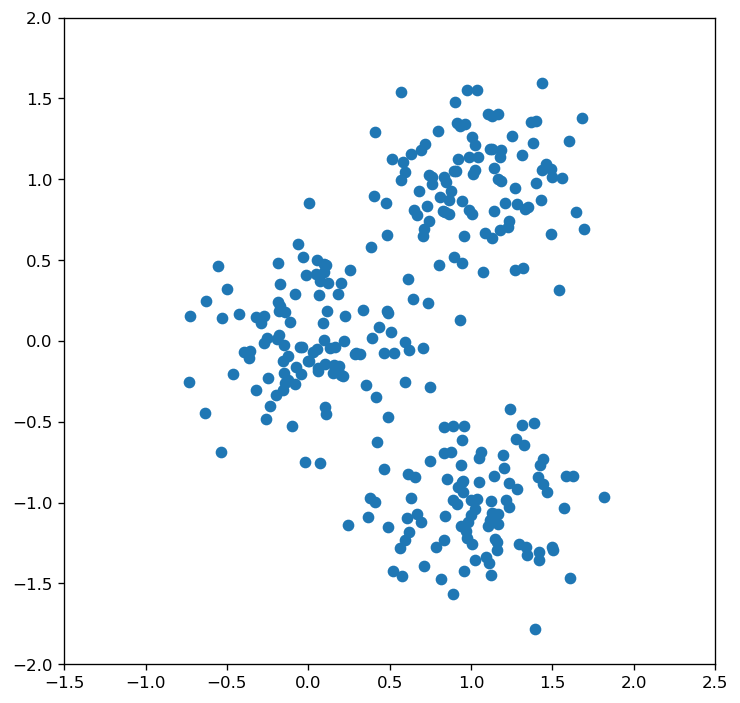

In [31]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

In [13]:
X[0]

array([ 0.08081482, -0.1920474 ])

In [33]:
A = Kmeans_alg(X,X[:3])

In [20]:
A[0]

[array([ 1.00966611, -1.06869239]),
 array([-0.03038799, -0.05850193]),
 array([0.98779064, 1.01670239])]

In [34]:
A[0]

[array([1.0312327 , 0.98105067]),
 array([0.02450426, 0.00946565]),
 array([ 1.02355876, -1.02392162])]

In [35]:
A

[[array([1.0312327 , 0.98105067]),
  array([0.02450426, 0.00946565]),
  array([ 1.02355876, -1.02392162])],
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

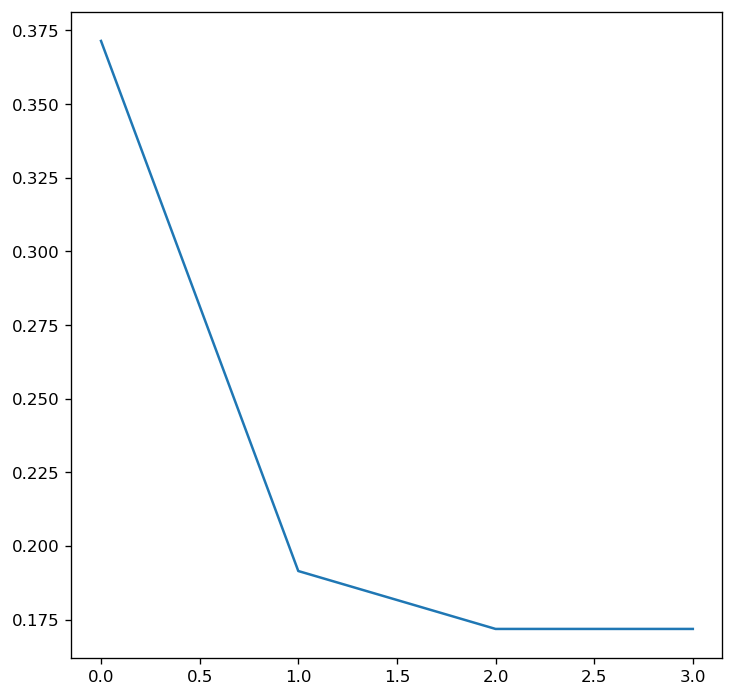

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

In [30]:
A[3]

4

In [24]:
data_sns = pd.DataFrame(data=X,columns=['X','Y'])
data_sns['grupo']=A[1]
data_sns

,X,Y,grupo
0,0.080815,-0.192047,2.0
1,-0.007566,-0.221368,2.0
2,0.133774,0.021226,2.0
3,0.290716,0.118782,2.0
4,-0.183475,0.126046,2.0
...,...,...,...
295,1.112042,-1.056623,1.0
296,1.640802,-0.144294,1.0
297,1.250704,-0.644250,1.0
298,1.224463,-0.723377,1.0


<Axes: xlabel='X', ylabel='Y'>

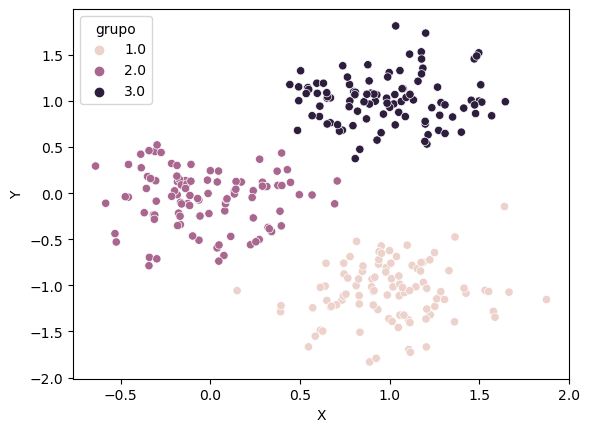

In [36]:
sns.scatterplot(
    data=data_sns,
    x = data_sns.X,
    y= data_sns.Y,
    hue=data_sns.grupo
)

In [15]:
from sklearn.datasets import fetch_openml
import random

In [16]:
import numpy as np
from sklearn.datasets import load_breast_cancer 
dataSet = load_breast_cancer() 
data = dataSet.data

In [17]:
data[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [18]:
A = Kmeans_alg(data,data[:2])
A


[[array([1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
         9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
         1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
         2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
         2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
         1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
         1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
         2.83553653e-01, 8.32819406e-02]),
  array([1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
         1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
         1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
         5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
         4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
         2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        

In [19]:
np.unique(A[1], return_counts=True)

(array([1., 2.]), array([438, 131]))

In [20]:
np.shape(data)

(569, 30)

In [21]:
import numpy as np
from sklearn.datasets import load_breast_cancer 
dataSet = load_breast_cancer() 
data = dataSet.data 

In [22]:
a = [ 1.95549103,  2.01534324,  1.57476236,  0.41230402, -1.64797285, -1.88712578,
 -1.69938709, -1.14554822, 0.74721043, 1.40194224]

b = [-2.08024322, -0.57860175,  0.4719788, 1.40672063, 2.39433809, 1.85156671,
  0.86200697, -0.9201432, -2.30401734,  -2.16378775]

In [23]:
def correlacion(a,b):
    a,b = demean(a),demean(b)
    return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b))

def demean(a):
    return a - np.mean(a)*np.array([1]*len(a))

In [24]:
correlacion(a,b)

-0.6462021854963492

In [25]:
from sklearn.datasets import fetch_openml
import random

In [26]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/home/dionicio/anaconda3/envs/platzi/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


: 

: 